# 계단 함수 구현

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def step_function(x):
    return x > 0

In [3]:
arr = np.array([-1.0, 0.0, 1.0, 2.0])

In [4]:
step_function(arr)

array([False, False,  True,  True])

In [5]:
step_function(arr).astype(np.int32)

array([0, 0, 1, 1])

# 계단 함수 그래프

In [6]:
def np_step_function(x):
    return np.array(x > 0, dtype=np.int64)

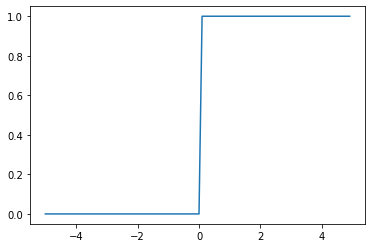

In [7]:
x = np.arange(-5, 5, 0.1)
y = np_step_function(x)
plt.plot(x, y)
plt.show()

# 시그모이드 함수 구현

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
sigmoid(np.array([-1, 1, 2]))

array([0.26894142, 0.73105858, 0.88079708])

# 시그모이드 함수 그래프

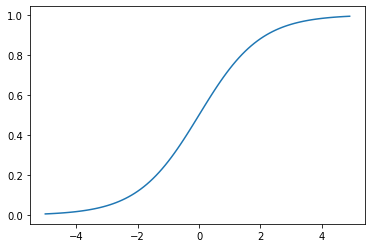

In [10]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

# 계단, 시그모이드 함수 비교

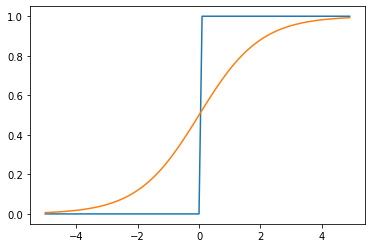

In [11]:
x = np.arange(-5, 5, 0.1)
y_step = np_step_function(x)
y_sigmoid = sigmoid(x)
plt.plot(x, y_step, x, y_sigmoid)
plt.show()

# ReLU(Rectified Linear Unit)

In [12]:
def relu(x):
    return np.maximum(0, x)

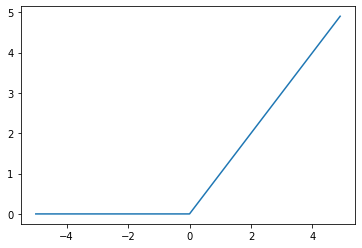

In [13]:
x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

In [14]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 2], [3, 4]]) + 4
print(np.dot(A, B))
print(np.dot(B, A))

[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


# 신경망 행렬 곱

In [15]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
Y

array([ 5, 11, 17])

# 3층 신경망 구현

## 입력층(0층) -> 은닉층(1층)

In [16]:
X = np.array([1, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


## 은닉층(1층) -> 은닉층(2층)

In [17]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


## 은닉층(2층) -> 출력층(3층)

In [18]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Z3 = identity_function(A3)
print(A3)
print(Z3)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


## 정리

In [19]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B3'] = np.array([0.1, 0.2])
    return network

def forward(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    
    A1 = np.dot(X, W1) + B1
    Z1 = sigmoid(A1)
    print(A1)
    print(Z1)
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    print(A2)
    print(Z2)
    A3 = np.dot(Z2, W3) + B3
    Y = identity_function(A3)
    print(A3)
    print(Y)    
    return Y

network = init_network()
X = np.array([1.0, 0.5])
Y = forward(network, X)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]
[0.31682708 0.69627909]
[0.31682708 0.69627909]


# 소프트맥스 함수 구현

In [20]:
def softmax(A):
    exp_A = np.exp(A)
    sum_exp_A = np.sum(exp_A)
    Y = exp_A / sum_exp_A
    return Y

softmax(np.array([0.3, 2.9, 4]))

array([0.01821127, 0.24519181, 0.73659691])

In [21]:
softmax(np.array([1010, 1000, 990]))

<ipython-input-20-e1194a0fe944>:2: RuntimeWarning: overflow encountered in exp
  exp_A = np.exp(A)
<ipython-input-20-e1194a0fe944>:4: RuntimeWarning: invalid value encountered in true_divide
  Y = exp_A / sum_exp_A


array([nan, nan, nan])

# 오버플로우를 예방하는 소프트맥스 함수 구현

In [22]:
def softmax(A):
    c = np.max(A)
    exp_A = np.exp(A - c)
    sum_exp_A = np.sum(exp_A)
    Y = exp_A / sum_exp_A
    return Y

softmax(np.array([1010, 1000, 990]))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

# MNIST

In [23]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [24]:
from PIL import Image
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
# img_show(img)

5
(784,)
(28, 28)


In [25]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['b1'], network['b2'], network['b3']
    
    A1 = np.dot(x, W1) + B1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + B3
    Y = softmax(A3)
    return Y

In [26]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
print(f'Accuracy: {accuracy_cnt / len(x)}')

Accuracy: 0.9352


- 정규화(Normalization) 처리 유무에 따라서 성능에 차이가 있을 수 있다.

# 배치 처리(성능 향상)

In [27]:
x, t = get_data()
network = init_network()
batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
print(f'Accuracy: {accuracy_cnt / len(x)}')

Accuracy: 0.9352
